In [250]:
# create school ranking + coonduct linear regression

In [420]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [421]:
# Import dataset
pod = pd.read_excel('/Users/e.kubicek/Documents/NDC/PODproject/data/xlsx_cleaned/POD_2018-2020_v2.xlsx', sheet_name = 1)


In [422]:
# Check data
pod.head(30)

,Response ID,IP Address,Finished,Consent,pod_rank,Online course material are likely to be accessible to me.,Videos my classmates share are likely to have captions.,Faculty use technology-based live polls during class to encourage classroom participation.,Image descriptions are likely to be available if I need them.,Faculty are likely to support individual differences and diverse perspectives in the classroom.,...,ACC most other,ACC most none,Receptive Language: listening/watching - Classroom lectures,Receptive Language: listening/watching - Small-group discussions,Receptive Language: listening/watching - One-on-one discussions with faculty,Receptive Language: listening/watching - Social interaction with peers,Expressive Language: sharing thoughts and ideas - Classroom lectures,Expressive Language: sharing thoughts and ideas - Small-group discussions,Expressive Language: sharing thoughts and ideas - One-on-one discussions with faculty,Expressive Language: sharing thoughts and ideas - Social interaction with peers
0,R_1exIekWKlFXf0ZJ,104.7.216.163,True,NaN,1.973684,3,1.0,4.0,1.0,3.0,...,0.0,0.0,ASL,ASL,Speechreading,Speechreading,ASL,ASL,Spoken English,Spoken English
1,R_s58aBBBZclnTWVj,174.222.154.176,True,NaN,2.921053,4,3.0,2.0,2.0,3.0,...,0.0,0.0,Written/Text Communication,ASL,ASL,Written/Text Communication,ASL,ASL,Written/Text Communication,Written/Text Communication
2,R_pufhK7pImb20kjT,76.89.206.42,True,NaN,2.315789,4,3.0,1.0,1.0,1.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL
3,R_ZrEqWB74LLKLNdL,47.184.147.196,True,"Yes, I agree to participate.",2.657895,3,2.0,2.0,2.0,3.0,...,0.0,0.0,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English
4,R_3lWaASQiBdOCByc,155.41.184.25,True,"Yes, I agree to participate.",1.815789,3,1.0,1.0,1.0,3.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL
5,R_3fNSUGtaIqL0byz,73.76.230.94,True,NaN,1.736842,1,2.0,1.0,1.0,1.0,...,0.0,0.0,ASL,ASL,Written/Text Communication,Written/Text Communication,ASL,ASL,Written/Text Communication,Written/Text Communication
6,R_31KlccS7IJCsSy9,134.231.167.178,True,NaN,2.684211,3,3.0,3.0,1.0,2.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL
7,R_2CqU0e5uC8qH3yi,68.194.242.13,True,NaN,1.710526,1,1.0,3.0,0.0,2.0,...,0.0,0.0,"English-based system (e.g., SEE, MCE)",ASL,ASL,ASL,ASL,ASL,Speechreading & Spoken English,ASL
8,R_2Cqvic9Q13I1mYK,136.62.74.40,True,NaN,1.710526,2,1.0,1.0,1.0,2.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL
9,R_1F3el0yTfl0S6Kn,107.77.226.106,True,"Yes, I agree to participate.",2.947368,4,3.0,3.0,3.0,4.0,...,1.0,0.0,ASL,ASL,Spoken English,ASL,Spoken English,Spoken English,Spoken English,Spoken English


In [423]:
# Change column names
colnames = pd.read_excel('/Users/e.kubicek/Documents/NDC/PODproject/data/xlsx_cleaned/POD_2018-2020_v2.xlsx', sheet_name = 7)

In [424]:
pod.columns = colnames['recoded']
pod.head()

recoded,META1,META2,META5,Consent,pod_rank,TECH1,TECH2,TECH3,TECH4,ATTI1,...,ACC6,ACC7,LANG1,LANG2,LANG3,LANG4,LANG5,LANG6,LANG7,LANG8
0,R_1exIekWKlFXf0ZJ,104.7.216.163,True,NaN,1.973684,3,1.0,4.0,1.0,3.0,...,0.0,0.0,ASL,ASL,Speechreading,Speechreading,ASL,ASL,Spoken English,Spoken English
1,R_s58aBBBZclnTWVj,174.222.154.176,True,NaN,2.921053,4,3.0,2.0,2.0,3.0,...,0.0,0.0,Written/Text Communication,ASL,ASL,Written/Text Communication,ASL,ASL,Written/Text Communication,Written/Text Communication
2,R_pufhK7pImb20kjT,76.89.206.42,True,NaN,2.315789,4,3.0,1.0,1.0,1.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL
3,R_ZrEqWB74LLKLNdL,47.184.147.196,True,"Yes, I agree to participate.",2.657895,3,2.0,2.0,2.0,3.0,...,0.0,0.0,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English
4,R_3lWaASQiBdOCByc,155.41.184.25,True,"Yes, I agree to participate.",1.815789,3,1.0,1.0,1.0,3.0,...,0.0,0.0,ASL,ASL,ASL,ASL,ASL,ASL,ASL,ASL


In [425]:
pod['DEMO1']

0         Female
1      Nonbinary
2         Female
3         Female
4         Female
         ...    
779          NaN
780          NaN
781          NaN
782          NaN
783          NaN
Name: DEMO1, Length: 784, dtype: object

(array([ 24.,   8.,  18.,  39.,  85.,  72., 100.,  70.,  43.,  23.]),
 array([0.18421053, 0.56578947, 0.94736842, 1.32894737, 1.71052632,
        2.09210526, 2.47368421, 2.85526316, 3.23684211, 3.61842105,
        4.        ]),
 <a list of 10 Patch objects>)

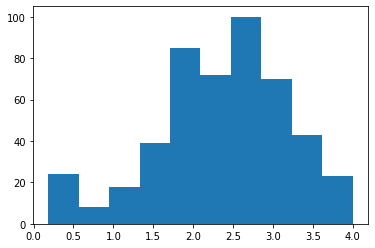

In [426]:
# look at distribution of ranks (remove rank 0s - means they did not respond)
pod_1 = pod[pod['pod_rank'] != 0]
plt.hist(pod_1.pod_rank)

In [427]:
# one hot encode gender variable
pod_2 = pd.concat([pod_1,pd.get_dummies(pod_1["DEMO1"], prefix = 'gender')
],axis=1)

# drop old gender column
pod_2.drop(['DEMO1'], axis = 1, inplace = True)

# Check data
pod_2

,META1,META2,META5,Consent,pod_rank,TECH1,TECH2,TECH3,TECH4,ATTI1,...,LANG4,LANG5,LANG6,LANG7,LANG8,gender_Another identity not listed,gender_Female,gender_Male,gender_Nonbinary,gender_Prefer not to answer
0,R_1exIekWKlFXf0ZJ,104.7.216.163,True,NaN,1.973684,3,1.0,4.0,1.0,3.0,...,Speechreading,ASL,ASL,Spoken English,Spoken English,0,1,0,0,0
1,R_s58aBBBZclnTWVj,174.222.154.176,True,NaN,2.921053,4,3.0,2.0,2.0,3.0,...,Written/Text Communication,ASL,ASL,Written/Text Communication,Written/Text Communication,0,0,0,1,0
2,R_pufhK7pImb20kjT,76.89.206.42,True,NaN,2.315789,4,3.0,1.0,1.0,1.0,...,ASL,ASL,ASL,ASL,ASL,0,1,0,0,0
3,R_ZrEqWB74LLKLNdL,47.184.147.196,True,"Yes, I agree to participate.",2.657895,3,2.0,2.0,2.0,3.0,...,Spoken English,Spoken English,Spoken English,Spoken English,Spoken English,0,1,0,0,0
4,R_3lWaASQiBdOCByc,155.41.184.25,True,"Yes, I agree to participate.",1.815789,3,1.0,1.0,1.0,3.0,...,ASL,ASL,ASL,ASL,ASL,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,R_3pl4WO9BAhxAwv2,72.88.173.138,True,"Yes, I agree to participate.",3.842105,4,4.0,4.0,4.0,4.0,...,ASL,ASL,Another communication modality not listed,ASL,ASL,0,0,1,0,0
775,R_2WHDi8lZsi00tXJ,99.203.82.247,False,"Yes, I agree to participate.",0.342105,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
776,R_2tyYgYq6YyBAtLH,24.69.151.140,False,"Yes, I agree to participate.",2.842105,3,4.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
780,R_2XbyU9lOwLEunDV,130.166.199.224,False,"Yes, I agree to participate.",1.236842,0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [428]:
# One hot encode receptive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG1"], prefix = 'rl_classlectures')
],axis=1)

# drop old column
pod_2.drop(['LANG1'], axis = 1, inplace = True)


# One hot encode receptive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG2"], prefix = 'rl_smallgroup')
],axis=1)

# drop old column
pod_2.drop(['LANG2'], axis = 1, inplace = True)


# One hot encode receptive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG3"], prefix = 'rl_1x1wfac')
],axis=1)

# drop old column
pod_2.drop(['LANG3'], axis = 1, inplace = True)


# One hot encode receptive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG4"], prefix = 'rl_socialintwpeers')
],axis=1)

# drop old column
pod_2.drop(['LANG4'], axis = 1, inplace = True)


# One hot encode expressive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG5"], prefix = 'el_classlectures')
],axis=1)

# drop old column
pod_2.drop(['LANG5'], axis = 1, inplace = True)


# One hot encode expressive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG6"], prefix = 'el_smallgroup')
],axis=1)

# drop old column
pod_2.drop(['LANG6'], axis = 1, inplace = True)


# One hot encode expressive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG7"], prefix = 'el_1x1wfac')
],axis=1)

# drop old column
pod_2.drop(['LANG7'], axis = 1, inplace = True)


# One hot encode expressive language variables
pod_2 = pd.concat([pod_2,pd.get_dummies(pod_2["LANG8"], prefix = 'el_socialintwpeers')
],axis=1)

# drop old column
pod_2.drop(['LANG8'], axis = 1, inplace = True)


pod_2

,META1,META2,META5,Consent,pod_rank,TECH1,TECH2,TECH3,TECH4,ATTI1,...,el_1x1wfac_Written/Text Communication,el_socialintwpeers_ASL,el_socialintwpeers_Another communication modality not listed,"el_socialintwpeers_Contact Signing (e.g., PSE, CASE)","el_socialintwpeers_English-based signing (e.g., SEE, MCE)",el_socialintwpeers_Simcom,el_socialintwpeers_Speechreading,el_socialintwpeers_Speechreading & Spoken English,el_socialintwpeers_Spoken English,el_socialintwpeers_Written/Text Communication
0,R_1exIekWKlFXf0ZJ,104.7.216.163,True,NaN,1.973684,3,1.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,R_s58aBBBZclnTWVj,174.222.154.176,True,NaN,2.921053,4,3.0,2.0,2.0,3.0,...,1,0,0,0,0,0,0,0,0,1
2,R_pufhK7pImb20kjT,76.89.206.42,True,NaN,2.315789,4,3.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,R_ZrEqWB74LLKLNdL,47.184.147.196,True,"Yes, I agree to participate.",2.657895,3,2.0,2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,1,0
4,R_3lWaASQiBdOCByc,155.41.184.25,True,"Yes, I agree to participate.",1.815789,3,1.0,1.0,1.0,3.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,R_3pl4WO9BAhxAwv2,72.88.173.138,True,"Yes, I agree to participate.",3.842105,4,4.0,4.0,4.0,4.0,...,0,1,0,0,0,0,0,0,0,0
775,R_2WHDi8lZsi00tXJ,99.203.82.247,False,"Yes, I agree to participate.",0.342105,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
776,R_2tyYgYq6YyBAtLH,24.69.151.140,False,"Yes, I agree to participate.",2.842105,3,4.0,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
780,R_2XbyU9lOwLEunDV,130.166.199.224,False,"Yes, I agree to participate.",1.236842,0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Set x (features/independent variables) and y (dependent) values
x = pod_2.iloc[:,43:]
y = np.ravel(pod_2['pod_rank'].values.reshape(-1,1))

# Split for train/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [441]:
# Create + apply model
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.predict(x_test)

array([2.38870745, 1.14059777, 3.06943078, 3.0833468 , 2.98703332,
       1.14059777, 3.16464563, 2.72775598, 2.36935754, 2.91525598,
       2.0734591 , 1.14059777, 2.5343966 , 3.01718469, 2.68979211,
       1.14059777, 1.79904504, 2.94894738, 3.7687716 , 2.55112024,
       2.96591516, 2.35898156, 2.59433313, 2.55624719, 2.50461145,
       0.82199426, 2.69345422, 3.19467501, 1.14059777, 1.14059777,
       1.66427941, 2.78073449, 2.87228723, 1.66672082, 2.74032922,
       2.37118859, 2.0734591 , 2.44040117, 1.14059777, 2.17245813,
       2.7441134 , 2.77531324, 2.77646203, 4.30978723, 1.14059777,
       2.55497754, 2.07785363, 2.76669641, 2.89242883, 2.73471399,
       2.58517785, 2.51584191, 1.48312707, 2.47214074, 2.75217004,
       2.16440149, 2.34238   , 2.47917557, 2.43564172, 3.06503625,
       2.19613977, 1.14059777, 2.78024621, 3.18811218, 2.59469934,
       2.53634973, 4.15097375, 2.41855188, 2.54391809, 1.14059777,
       2.01437707, 1.45578332, 1.14059777, 3.25912805, 2.70005

In [442]:
# Check score of model
clf.score(x_test,y_test)

0.31467798194365904

In [443]:
# Check metrics of model
y_pred = clf.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49139470259039336
Mean Squared Error: 0.4002846501623804
Root Mean Squared Error: 0.6326805277249967


In [360]:
# Examine feature importance
importance = clf.coef_

In [361]:
importance

array([-2.70012641e-01,  1.56266628e-01,  2.06262928e-01,  1.00108367e-01,
       -3.21661329e-02,  5.46948376e-01, -3.96943859e-01, -1.61093654e-02,
        2.04071473e-01, -2.93871811e-01, -1.09636267e-01, -4.65385765e-01,
       -4.64552921e-04, -3.01644556e-01,  1.32203904e-01, -1.32907147e-01,
       -1.49241972e-01,  2.19954839e-01, -1.04207743e-02, -2.38879158e-01,
       -4.16377695e-01, -1.97698207e-01, -3.71027906e-02,  1.99962206e-01,
        2.69186109e-02, -9.00879698e-02, -1.74131819e-01, -3.87396920e-02,
       -1.07248713e-01,  2.50020927e-01,  2.06535580e-02,  1.12326917e-01,
        2.75943594e-02, -1.67446016e-02,  1.52925327e-01, -1.18706460e-01,
        1.41622526e-01,  2.47488442e-02,  5.14641763e-01,  1.77535840e+00,
        1.55874950e+00,  1.75660273e+00,  1.43677616e+00,  1.87783775e+00,
       -2.70630888e+10, -2.70630888e+10, -2.70630888e+10, -2.70630888e+10,
       -2.70630888e+10, -2.70630888e+10, -2.70630888e+10, -2.70630888e+10,
       -2.70630888e+10,  

In [444]:
# Correlation with output variable
cor = pd.concat([pod_2.iloc[:,4], pod_2.iloc[:,43:]], axis = 1).corr()
cor_target = abs(cor["pod_rank"])

# Selecting features that are highly correlated with target
relevant_features = cor_target[cor_target > .20]
relevant_features

pod_rank                             1.000000
DEMO14                               0.203545
DEMO19                               0.299099
DEMO26                               0.534453
DEMO28                               0.499219
DEMO35                               0.278054
ACC1                                 0.204614
ACC3                                 0.302163
ACC5                                 0.261488
gender_Female                        0.293794
rl_classlectures_Spoken English      0.216142
rl_smallgroup_Spoken English         0.201880
rl_1x1wfac_Spoken English            0.210102
rl_socialintwpeers_Spoken English    0.240849
el_socialintwpeers_Spoken English    0.210341
Name: pod_rank, dtype: float64

In [445]:
relevant_features.keys()[1:]

Index(['DEMO14', 'DEMO19', 'DEMO26', 'DEMO28', 'DEMO35', 'ACC1', 'ACC3',
       'ACC5', 'gender_Female', 'rl_classlectures_Spoken English',
       'rl_smallgroup_Spoken English', 'rl_1x1wfac_Spoken English',
       'rl_socialintwpeers_Spoken English',
       'el_socialintwpeers_Spoken English'],
      dtype='object')

In [446]:
# Use pearson correlation to check correlation among relevant independent variables
relevant_variables = pod_2[['DEMO14', 'DEMO19', 'DEMO26', 'DEMO28', 'DEMO35', 'ACC1', 'ACC3',
       'ACC5', 'gender_Female', 'rl_classlectures_Spoken English',
       'rl_smallgroup_Spoken English', 'rl_1x1wfac_Spoken English',
       'rl_socialintwpeers_Spoken English',
       'el_socialintwpeers_Spoken English']]

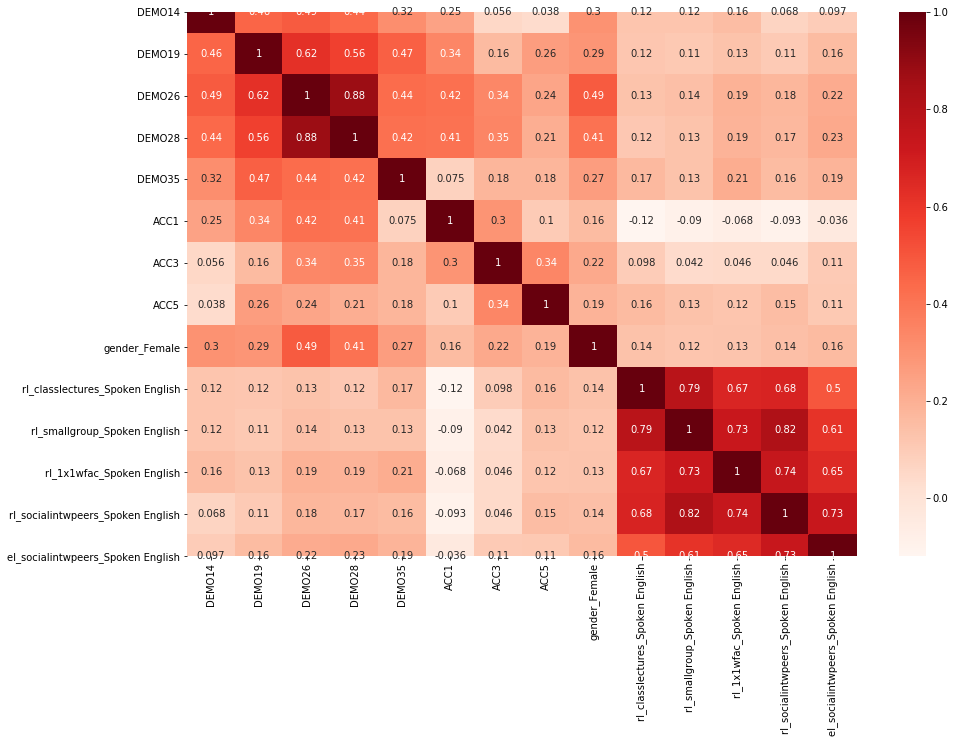

In [447]:
# Visualization pearson correlation
plt.figure(figsize=(15,10))
cor = relevant_variables.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [448]:
correlated_features = set()
correlation_matrix = relevant_variables.corr()

In [449]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [450]:
correlated_features

{'DEMO26',
 'DEMO28',
 'el_socialintwpeers_Spoken English',
 'rl_1x1wfac_Spoken English',
 'rl_smallgroup_Spoken English',
 'rl_socialintwpeers_Spoken English'}

In [370]:
# Decide which to keep among the highly correlated
pod_2[["DEMO26", "DEMO28"]].corr() # should get rid of 26

,DEMO26,DEMO28
DEMO26,1.000000,0.880319
DEMO28,0.880319,1.000000


In [336]:
pod_2[["el_socialintwpeers_Spoken English","rl_1x1wfac_Spoken English"]].corr() # Get rid of rl_1x1

,el_socialintwpeers_Spoken English,rl_1x1wfac_Spoken English
el_socialintwpeers_Spoken English,1.000000,0.649381
rl_1x1wfac_Spoken English,0.649381,1.000000


In [337]:
pod_2[['rl_smallgroup_Spoken English',
 'rl_socialintwpeers_Spoken English']].corr() # should get rid of rl_smallgruop_Spoken English

,rl_smallgroup_Spoken English,rl_socialintwpeers_Spoken English
rl_smallgroup_Spoken English,1.000000,0.821152
rl_socialintwpeers_Spoken English,0.821152,1.000000


In [451]:
to_get_rid_of = {'DEMO26','rl_1x1wfac_Spoken English','rl_smallgroup_Spoken English'}

In [452]:
# Get rid of relevant features that are highly correlated
x_train.drop(labels = to_get_rid_of, axis=1, inplace=True)
x_test.drop(labels = to_get_rid_of, axis=1, inplace=True)

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [453]:
# Redo training now that highly correlated features are gone
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
lr2.predict(x_test)

array([2.38766211, 1.14187951, 3.07028527, 3.08224816, 2.99295373,
       1.14187951, 3.1203341 , 2.72635217, 2.36893029, 2.92996545,
       2.08523889, 1.14187951, 2.54178186, 3.01657434, 2.69577356,
       1.14187951, 1.79562707, 2.96091027, 3.7685885 , 2.55026574,
       2.9462008 , 2.40500207, 2.59866662, 2.55905481, 2.50387902,
       0.87027307, 2.69504113, 3.17615986, 1.14187951, 1.14187951,
       1.63009973, 2.78006311, 2.87039514, 1.66330285, 2.72433801,
       2.36947961, 2.08206506, 2.57947013, 1.14187951, 2.15903039,
       2.73953576, 2.91672175, 2.74270959, 4.30057092, 1.14187951,
       2.54628452, 2.07254357, 2.77121301, 2.91916223, 2.73605676,
       2.56991906, 2.50516076, 1.35837121, 2.49881311, 2.75809045,
       2.16818566, 2.34396691, 2.48516163, 2.43753381, 3.05441613,
       2.19650598, 1.14187951, 2.77951379, 3.16743167, 2.59622522,
       2.53616662, 4.12375207, 2.4172091 , 2.54129357, 1.14187951,
       1.99930139, 1.46292443, 1.14187951, 3.24240441, 2.83408

In [454]:
# Check score of model
lr2.score(x_test,y_test)

0.3181131922342997

In [455]:
# Check metrics of model
y_pred = lr2.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4913948293965088
Mean Squared Error: 0.39827820368438294
Root Mean Squared Error: 0.6310928645487786


In [456]:
# New correlation with output variable
cor = pd.concat([pod_2['pod_rank'], pod_2[x_train.columns.to_series()]], axis = 1).corr()
cor_target = abs(cor["pod_rank"])

# Selecting features that are highly correlated with target
relevant_features = cor_target[cor_target > .20]
relevant_features

pod_rank                             1.000000
DEMO14                               0.203545
DEMO19                               0.299099
DEMO28                               0.499219
DEMO35                               0.278054
ACC1                                 0.204614
ACC3                                 0.302163
ACC5                                 0.261488
gender_Female                        0.293794
rl_classlectures_Spoken English      0.216142
rl_socialintwpeers_Spoken English    0.240849
el_socialintwpeers_Spoken English    0.210341
Name: pod_rank, dtype: float64

In [378]:
# Test for any negative correlations within relevant features
#test_cor_target = cor["pod_rank"]
#test_relevant_features = cor_target[cor_target < 0]
#test_relevant_features
#Found None

Series([], Name: pod_rank, dtype: float64)

In [457]:
# The most highly correlated variable to POD rank is earning a hs diploma
relevant_features.sort_values(ascending = False)

pod_rank                             1.000000
DEMO28                               0.499219
ACC3                                 0.302163
DEMO19                               0.299099
gender_Female                        0.293794
DEMO35                               0.278054
ACC5                                 0.261488
rl_socialintwpeers_Spoken English    0.240849
rl_classlectures_Spoken English      0.216142
el_socialintwpeers_Spoken English    0.210341
ACC1                                 0.204614
DEMO14                               0.203545
Name: pod_rank, dtype: float64

### Summary
We achieved a RMSE of .63. The top three most highly correlated features to the target variable (pod_rank) are having earned a HS diploma (r = .5), notetaking as the most used accomodation (r = .3), and identifying as having a sensory (hearing) disability (r = .3).

# Ignore below - previous approaches

In [106]:
# Backward Elimination
import statsmodels.api as sm

# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x)

# Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                                1.681732e-46
DEMO2                                                2.739051e-01
DEMO8                                                3.038437e-01
DEMO9                                                1.721156e-01
DEMO10                                               1.334457e-01
                                                         ...     
el_socialintwpeers_Simcom                            3.448257e-01
el_socialintwpeers_Speechreading                     5.033271e-01
el_socialintwpeers_Speechreading & Spoken English    3.968326e-01
el_socialintwpeers_Spoken English                    8.992076e-01
el_socialintwpeers_Written/Text Communication        2.885860e-01
Length: 118, dtype: float64

In [107]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['DEMO9', 'DEMO19', 'DEMO21', 'DEMO30', 'ACC3', 'ACC5', 'gender_Another identity not listed', 'gender_Female', 'gender_Male', 'gender_Nonbinary', 'gender_Prefer not to answer', 'rl_classlectures_Spoken English', 'rl_smallgroup_Cued Speech', 'el_smallgroup_Cued Speech', 'el_smallgroup_Simcom', 'el_1x1wfac_English-based signing (e.g., SEE, MCE)', 'el_socialintwpeers_English-based signing (e.g., SEE, MCE)']


In [108]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

model = LinearRegression()
# Initializing RFE model
rfe = RFE(model, 7)
# Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
# Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True False False False  True  True False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False  True False False False False False]
[ 67  81  69  80  98  68  87 111  72  93  91  76 102 109  84  86  85 108
  94  71  66  97  96  79 105  83  92 100  99  75 101  95 106 103  82 107
  90 110  70  62  61  60  63  59  54  51  55  56  58  50  52  57  53  47
  43  41  45  42  44  46  49  48   8  40  39  26  38  20  18  22  28

In [109]:
# no of features
nof_list = np.arange(1,91)            
high_score = 0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.117909


In [110]:
cols = list(x.columns)
model = LinearRegression()
#I nitializing RFE model
rfe = RFE(model, 6)             
# Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['rl_socialintwpeers_ASL',
       'rl_socialintwpeers_Contact Signing (e.g., PSE, CASE)',
       'rl_socialintwpeers_Spoken English', 'el_smallgroup_Cued Speech',
       'el_smallgroup_Simcom',
       'el_socialintwpeers_English-based signing (e.g., SEE, MCE)'],
      dtype='object')


In [112]:
# Embedded Method
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.003665
Best score using built-in LassoCV: 0.471151


In [114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 50 variables and eliminated the other 67 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

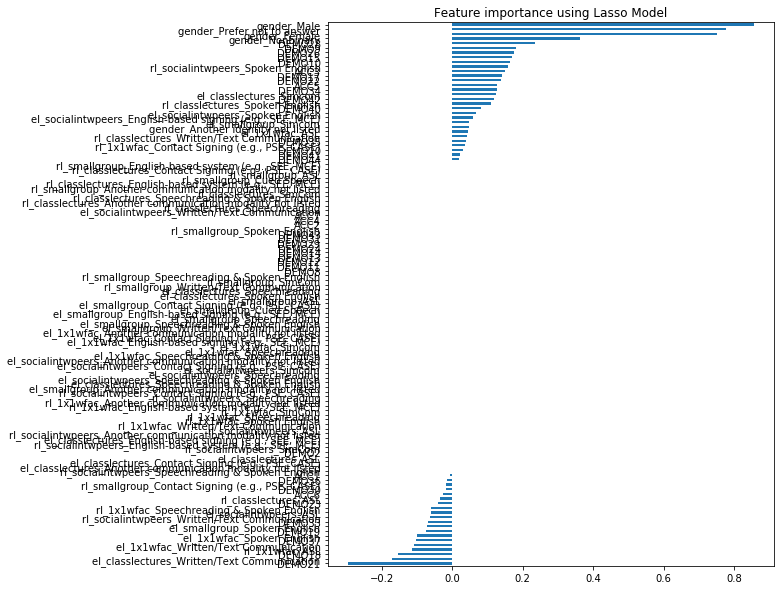

In [115]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")